In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import copy
import scrna._config

Zheng17
(10xchromiumv1)
Luecken2021
(multiome)
Hrvatin2016
(indrops)
Jensen2022
(smart-seq3xpress)
Macosko2015
(drop-seq)
Stuart2019
(cite-seq)
Wang2020
(10xchromiumv3)


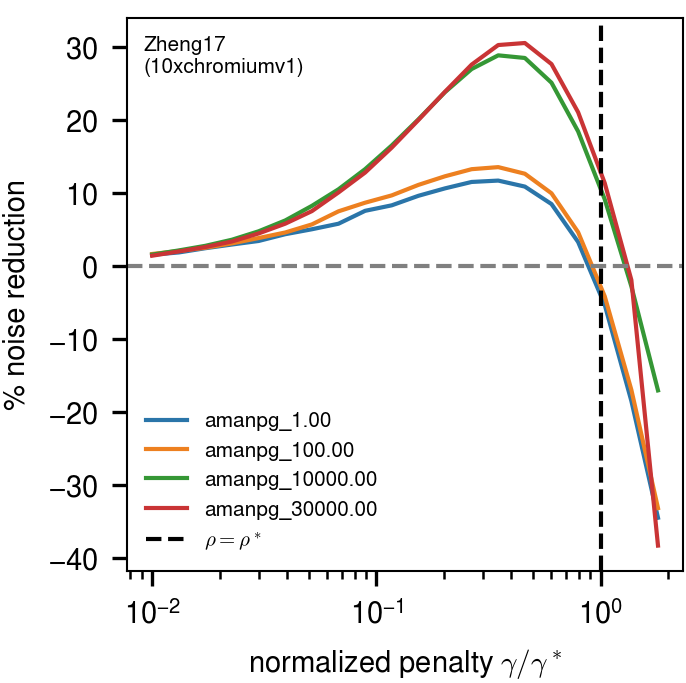

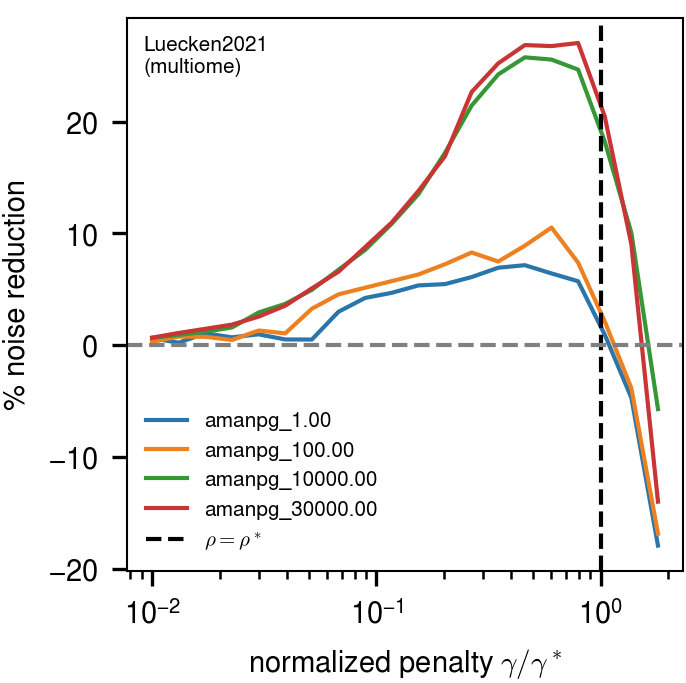

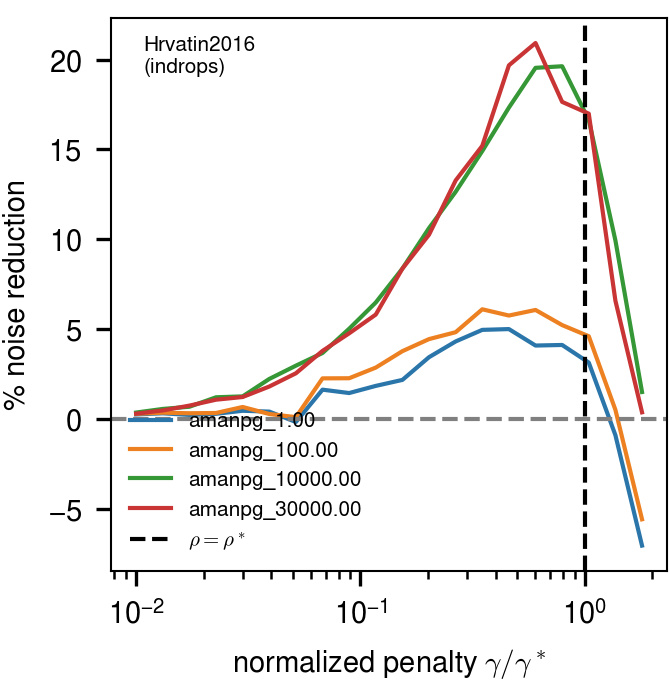

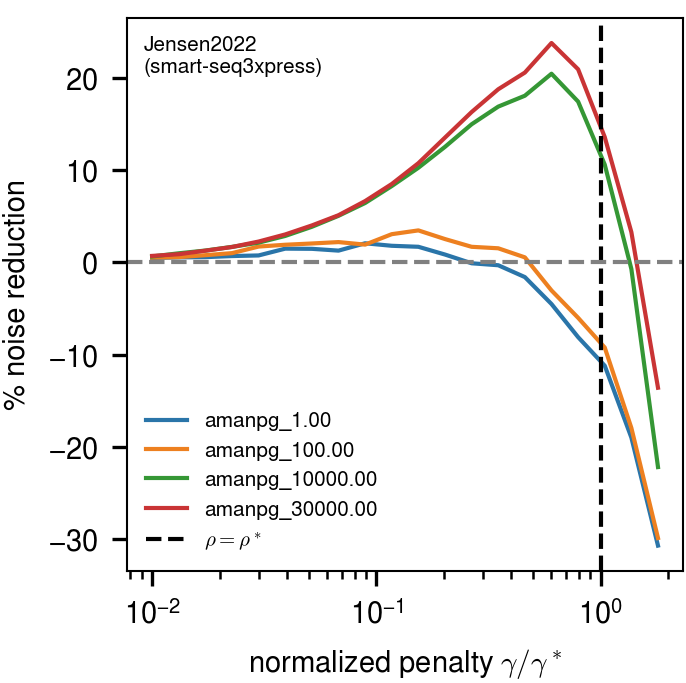

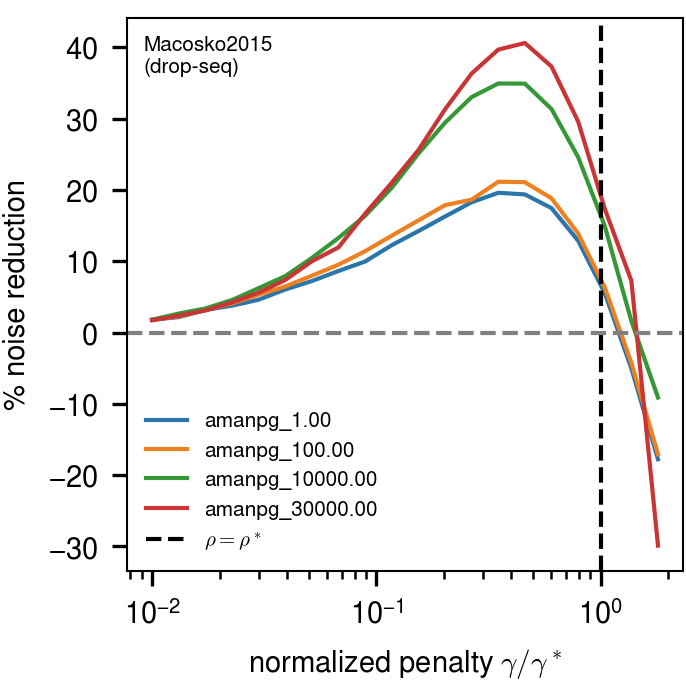

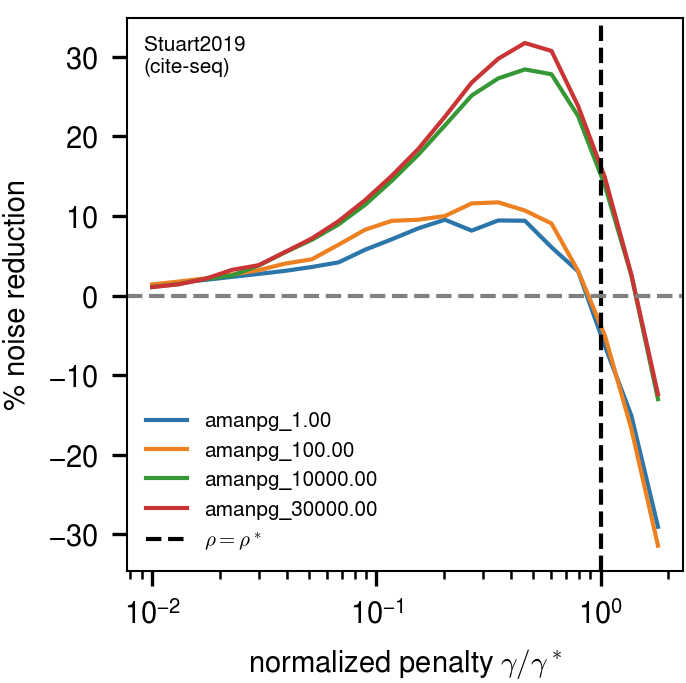

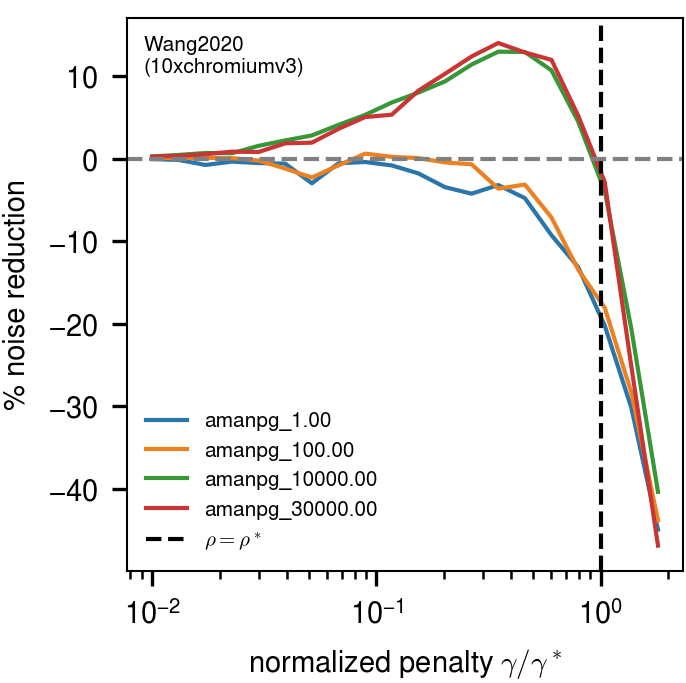

In [6]:
ngenes = 2000
flavor = 'seurat'

obs = json.load(open('figures/scan_amanpg_%s_%d_b.json' % (flavor, ngenes), 'r'))
facs = np.logspace(np.log10(0.01),np.log10(1.8), 20)

#json.dump(dists['drop-seq'], open('figures/drop-seq_scan.json', 'w'), cls=NumpyEncoder)

for name, _obs in obs.items():
    fig, ax = plt.subplots()
    colors = iter(sns.color_palette('tab10', desat=0.85))
    print(name)
    for (method, _data) in _obs.items():
        ax.plot(facs, -np.array(_data['data'])*100, '-', color = next(colors), label=method)

    ax.axvline(x = 1, color='k', linestyle='--', label=r'$\rho = \rho^*$')
    ax.axhline(y = 0,  linestyle='--', color='grey')

    ax.legend(frameon=False, loc='lower left', fontsize=5)

    ax.set_xscale('log')
    ax.set_xlabel(r'normalized penalty $\gamma/\gamma^*$')
    ax.set_ylabel(r'% noise reduction')
    lims = ax.get_ylim()
    ax.set_ylim(ymin = max(-80, lims[0]))
    ax.annotate(name, xy=(0.2, 0.85), xycoords='figure fraction', fontsize = 5)
    fig.savefig('figures/scan/scan_amanpg_%s_%d_%s.pdf' % (flavor, ngenes, name), dpi=300)